### Problem Statement
- **Elon Musk has started his own laptop company (Tesla Laptop) in India. He wants to give tough fights to big companies like Apple, Alienware, HP etc.**
- **He does not know how to estimate the price of laptops his company creates. In this competitive laptop market you cannot simply assume things.**
- **Musk wants to find out some relation between features of a Laptop(eg:- RAM, OS etc) and its selling price. But he is not so good at Data Mining.**
- **To solve this problem he already asked his Data Engineering team to collect laptop data from various competitors.**
- **Now he needs your (i.e Data Scientist’s) help to solve the following problem.**

#### Step- 1 (Data Analysis and Mining)
- Musk’s Requirements 
    1. Build an interface (using streamlit) for Elon Musk where he can enter the laptop features like RAM Size, RAM Type, HDD, OS, etc. and get the price prediction.
    2. Based on your Data Analysis and MIning skills, give recommendations to Elon Musk on how the pricing works in the laptop market.


#### Sprint - 2 (ML Model Tuning)
- Now he wants you to test the models you have created for Underfitting and Overfitting. He wants you to build a best fit model.
    1. First try to check if the models you have created are a best fit or not.
    2. See if applying cross validation helps improve your models performance.

### Task 3_Flipkart Laptop Data_Business Insights on Product Pricing
`Prasad Jadhav`

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import pickle
import joblib

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv('laptop_details.csv')
dataset.shape

(720, 4)

In [5]:
dataset.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [6]:
dataset.tail()

,Product,Rating,MRP,Feature
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...
719,Lenovo Ideapad Slim 3i Core i5 10th Gen - (8 G...,4.2,"₹50,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


`Sprint - 1 (Data Analysis and Mining)`

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [8]:
dataset.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [9]:
dataset.duplicated().sum()

297

In [5]:
dataset.MRP = dataset.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(int)

In [11]:
dataset.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [12]:
dataset['MRP'].describe()

count       720.000000
mean      81605.837500
std       61552.955102
min       14990.000000
25%       38996.750000
50%       59990.000000
75%       95240.000000
max      434830.000000
Name: MRP, dtype: float64

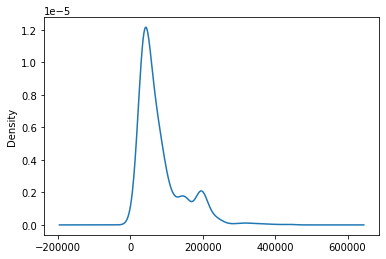

In [13]:
dataset['MRP'].plot(kind='kde')
plt.show()

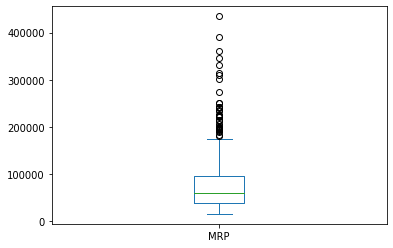

In [14]:
dataset['MRP'].plot(kind='box')
plt.show()

In [6]:
regex = r'^\w+'

dataset['Brand'] = dataset['Product'].apply(lambda x : re.findall(regex, x))
dataset['Brand'] = dataset['Brand'].apply(lambda x : ''.join(x))

In [7]:
regex = r'^(?:AMD|Intel|M1|Apple)[\s\w]+Processor'

dataset['Processor_Type'] = dataset['Feature'].apply(lambda x : re.findall(regex, x))
dataset['Processor_Type'] = dataset['Processor_Type'].apply(lambda x : ''.join(x))
dataset['Processor_Type'] = dataset['Processor_Type'].apply(lambda x : x.replace(' Processor', ''))

In [8]:
regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'

dataset['Storage'] = dataset['Feature'].apply(lambda x : re.findall(regex, x))
dataset['Storage'] = dataset['Storage'].apply(lambda x : ''.join(x))

In [9]:
dataset['Processor_Type'].value_counts()

Intel Core i5              150
Intel Core i3              129
AMD Ryzen 9 Octa Core       87
AMD Ryzen 7 Octa Core       79
Intel Core i7               49
AMD Ryzen 5 Hexa Core       48
AMD Ryzen 3 Dual Core       42
AMD Ryzen 5 Quad Core       37
                            32
Intel Celeron Dual Core     20
Intel Core i9               10
Apple M1                     7
Apple M1 Pro                 6
Apple M2                     5
AMD Ryzen 3 Quad Core        4
Intel Celeron Quad Core      3
Intel Pentium Quad Core      3
AMD Athlon Dual Core         2
Intel Pentium Silver         2
Apple M1 Max                 1
AMD Ryzen 7 Quad Core        1
AMD Ryzen 5 Dual Core        1
AMD Dual Core                1
AMD Ryzen 3 Hexa Core        1
Name: Processor_Type, dtype: int64

In [10]:
regex = r'[\d]+[\s]bit[\s\w]+Operating System|[\(Windows)\d\s]+Operating System|[\(Chrome|Mac OS)]+Operating System'

dataset['Operating_System'] = dataset['Feature'].apply(lambda x : re.findall(regex, x))
dataset['Operating_System'] = dataset['Operating_System'].apply(lambda x : ''.join(x))
dataset['Operating_System'] = dataset['Operating_System'].apply(lambda x : x.replace(' Operating_System', ''))

In [11]:
dataset['Operating_System'].value_counts()

64 bit Windows 11 Operating System                                404
Windows 11 Operating System                                       156
64 bit Windows 10 Operating System                                115
MMac OS Operating System                                           19
Windows 10 Operating System                                        12
MChrome Operating System                                            6
OS Operating System                                                 2
64 bit DOS Operating System                                         2
32 bit Windows 11 Operating System                                  1
5Operating System64 bit Windows 10 Operating System                 1
 Windows 10 Operating System64 bit Windows 10 Operating System      1
64 bit Chrome Operating System                                      1
Name: Operating_System, dtype: int64

In [12]:
regex = r'\d+\sGB[\s\w]+RAM'

dataset['RAM'] = dataset['Feature'].apply(lambda x : re.findall(regex, x))
dataset.RAM = dataset.RAM.apply(lambda x : ''.join(x))

In [13]:
print(dataset[dataset['Processor_Type']==''])

                                               Product  Rating     MRP  \
6    DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...     4.3   38990   
8    realme Book (Slim) Core i3 11th Gen - (8 GB/25...     4.4   46990   
29   realme Book (Slim) Core i3 11th Gen - (8 GB/25...     4.4   46990   
33   acer Aspire 7 Ryzen 5 Hexa Core AMD R5-5500U -...     4.4   47990   
53   realme Book(Slim) Intel Evo Core i5 11th Gen -...     4.4   59990   
54   acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...     4.4   47990   
69   DELL Ryzen 5 Hexa Core AMD R5-5600H - (16 GB/5...     4.6   70990   
83   SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (...     4.4   32990   
94   DELL Inspiron Pentium Silver - (8 GB/256 GB SS...     4.2   30428   
116  realme Book(Slim) Intel Evo Core i5 11th Gen -...     4.4   59990   
122  DELL Ryzen 7 Octa Core AMD R7-5800H - (16 GB/5...     5.0   89081   
142  DELL Vostro Ryzen 3 Dual Core R3-3250U - (8 GB...     3.8   33099   
172  DELL Inspiron Core i3 11th Gen - 

In [14]:
dataset.iloc[6,5] = 'Intel i3-1115G4'
dataset.iloc[8,5] = 'Intel Core i3'
dataset.iloc[29,5] = 'Intel Core i3'
dataset.iloc[33,5] = 'AMD Ryzen 5 Hexa Core'
dataset.iloc[53,5] = 'Intel Evo Core i5'
dataset.iloc[54,5] = 'Intel Core i5'
dataset.iloc[69,5] = 'AMD Ryzen R5-5600H'
dataset.iloc[83,5] = 'Qualcomm Snapdragon 7c Gen 2'
dataset.iloc[94,5] = 'Intel PQC-N5030'
dataset.iloc[116,5] = 'Gen Intel Evo Core i5'
dataset.iloc[122,5] =' AMD Ryzen 7 Octa Core'
dataset.iloc[142,5] = 'AMD Ryzen 3 Dual Core'
dataset.iloc[172,5] = 'Intel i3-1115G4'
dataset.iloc[232,5] = 'Intel Core i7'
dataset.iloc[249,5] = 'Intel i3-1125G4'
dataset.iloc[253,5] = 'AMD Ryzen 5-3450U'
dataset.iloc[259,5] = 'Intel Core i5'
dataset.iloc[349,5] = 'Intel Core i5-1135G7'
dataset.iloc[355,5] = 'Intel Core i3-1005G1'
dataset.iloc[393,5] = 'Intel Core i5'
dataset.iloc[438,5] = 'Intel Core i5'
dataset.iloc[443,5] = 'Intel Core i7'
dataset.iloc[502,5] = 'AMD Ryzen 5 Hexa Core'
dataset.iloc[508,5] = 'Intel Core i5 Pro'
dataset.iloc[593,5] = 'Intel i7-11800H'
dataset.iloc[622,5] = 'Intel Core i7'
dataset.iloc[628,5] = 'Intel Core i9'
dataset.iloc[643,5] = 'Intel Core i7'
dataset.iloc[644,5] = 'Intel Core i5'
dataset.iloc[645,5] = 'AMD Ryzen 5 Hexa Core'
dataset.iloc[688,5] = 'Intel Core i7'
dataset.iloc[689,5] = 'Intel Core i7'

In [15]:
len(dataset[dataset['Processor_Type']==''])

0

In [16]:
dataset['Operating_System'].unique()

array(['64 bit Windows 11 Operating System',
       '64 bit Windows 10 Operating System',
       'Windows 11 Operating System', 'MMac OS Operating System',
       'OS Operating System', 'Windows 10 Operating System',
       'MChrome Operating System', '32 bit Windows 11 Operating System',
       '5Operating System64 bit Windows 10 Operating System',
       '64 bit DOS Operating System',
       ' Windows 10 Operating System64 bit Windows 10 Operating System',
       '64 bit Chrome Operating System'], dtype=object)

In [17]:
dataset['Operating_System'].replace({'64 bit Windows 11 Operating System': 'Windows 11', '64 bit Windows 10 Operating System': 'Windows 10', 'Windows 11 Operating System': 'Windows 11',
                                'MMac OS Operating System': 'Mac', 'Windows 10 Operating System': 'Windows 10', 'MChrome Operating System': 'Chrome', '32 bit Windows 11 Operating System': 'Windows 11', 
                               ' OS Operating System': 'Mac', '5Operating System64 bit Windows 10 Operating System': 'Windows 10', '64 bit DOS Operating System': 'Mac', 'Windows 10 Operating System64 bit Windows 10 Operating System': 'Windows 10', 
                               '64 bit Chrome Operating System':'Chrome', 'OS Operating System': 'Mac', ' Windows 10 Operating System64 bit Windows 10 Operating System': 'Windows 10' },inplace=True)

dataset['Operating_System'] = dataset['Operating_System'].apply(lambda x : x.replace('64 bit', '').replace('64 bit','').replace('64 bit','').replace('System64 ','').replace('64 bit ','').replace('32 bit',''))
dataset['Operating_System'].unique()

array(['Windows 11', 'Windows 10', 'Mac', 'Chrome'], dtype=object)

In [18]:
dataset['Operating_System'].value_counts()

Windows 11    561
Windows 10    129
Mac            23
Chrome          7
Name: Operating_System, dtype: int64

In [19]:
dataset['RAM'].unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified Memory RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified Memory RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM',
       '32 GB Unified Memory RAM', '16 GB LPDDR4 RAM', '32 GB DDR5 RAM',
       '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM',
       '8 GB DDR5 RAM', '32 GB DDR4 RAM', '32 GB LPDDR4X RAM',
       '16 GB LPDDR3 RAM'], dtype=object)

In [20]:
dataset['RAM'] = dataset['RAM'].apply(lambda x : x.replace('128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM', '8 GB DDR4 RAM'))
dataset['RAM'] = dataset['RAM'].apply(lambda x : x.replace('Unified Memory', 'Unified'))
dataset['RAM'].unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM', '32 GB Unified RAM',
       '16 GB LPDDR4 RAM', '32 GB DDR5 RAM', '8 GB DDR5 RAM',
       '32 GB DDR4 RAM', '32 GB LPDDR4X RAM', '16 GB LPDDR3 RAM'],
      dtype=object)

In [21]:
dataset[['RAM_Size','GB', 'RAM_Type', 'RAM1']] = dataset['RAM'].str.split(' ', expand=True)

dataset.drop(['GB', 'RAM1', 'RAM'], axis=1, inplace=True)
dataset['RAM_Size'] = dataset['RAM_Size']+'GB'

In [22]:
dataset['RAM_Type'].value_counts()

DDR4       561
DDR5        92
LPDDR4X     37
Unified     12
LPDDR5       9
LPDDR4       8
LPDDR3       1
Name: RAM_Type, dtype: int64

In [23]:
dataset['Storage'].value_counts()

512 GB SSD                      375
1 TB SSD                        176
256 GB SSD                       98
1 TB HDD256 GB SSD               26
1 TB HDD                         17
                                 10
2 TB SSD                          7
128 GB SSD                        6
1 TB HDD512 GB SSD                2
128 GB SSD1 TB HDD128 GB SSD      2
256 GB HDD256 GB SSD              1
Name: Storage, dtype: int64

In [24]:
print(dataset[dataset['Storage']==''])

                                               Product  Rating    MRP  \
83   SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (...     4.4  32990   
89   Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...     NaN  19490   
96   Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...     NaN  19490   
345  ASUS Chromebook Flip Touch Celeron Dual Core -...     4.0  14990   
509  ASUS Chromebook Flip Touch Celeron Dual Core -...     4.0  24390   
544  ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...     4.5  21990   
559  ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...     4.0  19990   
632  Lenovo IdeaPad Flex 3 Chromebook Celeron Dual ...     3.6  28490   
695  ASUS Chromebook Celeron Dual Core - (4 GB/64 G...     4.1  25990   
715  ASUS Chromebook Flip Touch Celeron Dual Core -...     4.0  23490   

                                               Feature    Brand  \
83   Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPD...  SAMSUNG   
89   Intel Celeron Dual Core Processor4 GB DDR4 RAM...   Lenov

In [25]:
dataset.iloc[83,6] = '128GB EMMC'
dataset.iloc[89,6] = '64GB EMMC'
dataset.iloc[96,6] = '64GB EMMC'
dataset.iloc[345,6] = '32GB EMMC'
dataset.iloc[509,6] = '64GB EMMC'
dataset.iloc[544,6] = '64GB EMMC'
dataset.iloc[559,6] = '64GB EMMC'
dataset.iloc[632,6] = '128GB EMMC'
dataset.iloc[695,6] = '64GB EMMC'
dataset.iloc[715,6] = '64GB EMMC'

In [26]:
print(len(dataset[dataset['Storage']=='']))

0


In [27]:
dataset['Storage'].replace({'256 GB SSD':'256GB SSD'}, inplace=True)
dataset['Storage'].replace({'512 GB SSD':'512GB SSD'}, inplace=True)
dataset['Storage'].replace({'1 TB SSD':'1TB SSD'}, inplace=True)
dataset['Storage'].replace({'1 TB HDD':'1TB HDD'}, inplace=True)
dataset['Storage'].replace({'128 GB SSD':'128GB SSD'}, inplace=True)
dataset['Storage'].replace({'2 TB SSD':'2TB SSD'}, inplace=True)
dataset['Storage'].replace({'1 TB HDD256 GB SSD':'1TB HDD'}, inplace=True)
dataset['Storage'].replace({'256 GB HDD256 GB SSD':'256GB HDD'}, inplace=True)
dataset['Storage'].replace({'1 TB HDD512 GB SSD':'1TB HDD'}, inplace=True)
dataset['Storage'].replace({'128 GB SSD1 TB HDD128 GB SSD':'1TB HDD'}, inplace=True)

In [28]:
dataset[['Disc_Size', 'Disc_Type']] = dataset['Storage'].str.split(' ', expand=True)

dataset.drop(['Storage'], axis=1, inplace=True)

In [29]:
dataset['Disc_Size'].value_counts()

512GB    375
1TB      223
256GB     99
128GB      8
64GB       7
2TB        7
32GB       1
Name: Disc_Size, dtype: int64

In [30]:
dataset['Disc_Type'].value_counts()

SSD     662
HDD      48
EMMC     10
Name: Disc_Type, dtype: int64

In [31]:
dataset.isnull().sum()

Product               0
Rating              139
MRP                   0
Feature               0
Brand                 0
Processor_Type        0
Operating_System      0
RAM_Size              0
RAM_Type              0
Disc_Size             0
Disc_Type             0
dtype: int64

In [32]:
dataset['Rating'].fillna(dataset['Rating'].median(), inplace=True)

In [33]:
dataset.duplicated().sum()

296

In [34]:
dataset = dataset.drop_duplicates()

**`Univariate & Bivariate Analysis`**

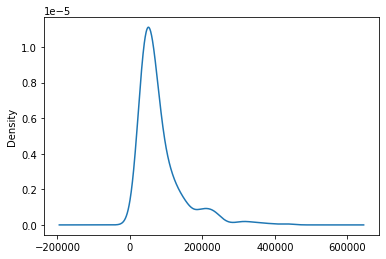

In [44]:
dataset['MRP'].plot(kind='kde')
plt.show()

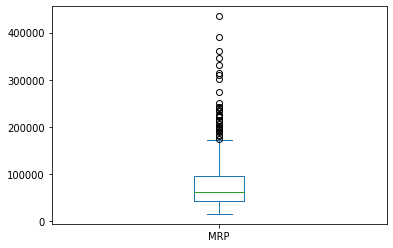

In [45]:
dataset['MRP'].plot(kind='box')
plt.show()

<Figure size 1080x360 with 0 Axes>

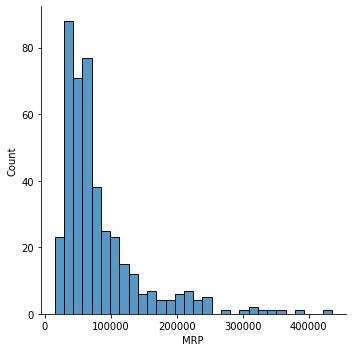

In [46]:
plt.figure(figsize=(15,5))
sns.displot(dataset['MRP'],palette='Set2')
plt.show()

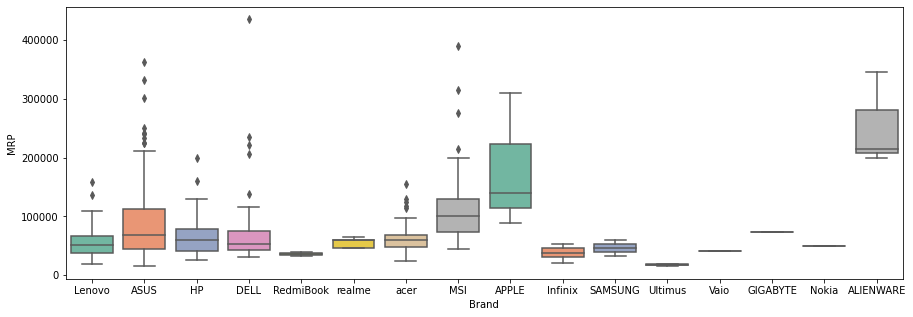

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(dataset['Brand'],dataset['MRP'],palette='Set2')
plt.show()

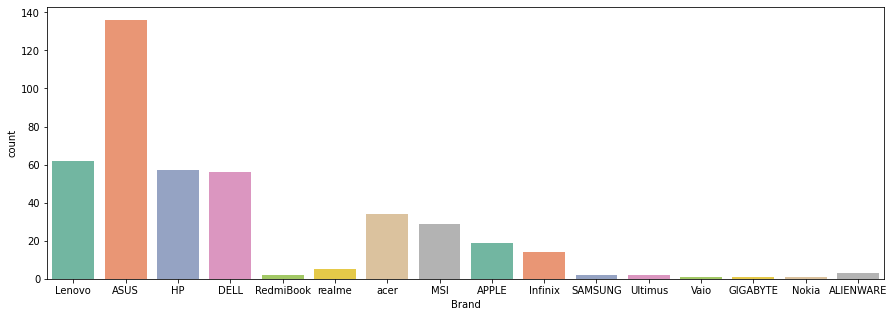

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(dataset['Brand'],palette='Set2')
plt.show()

In [49]:
dataset.groupby(['Brand']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                       
              min     max           mean
Brand                                   
ALIENWARE  199990  345390  253390.000000
APPLE       88990  309490  162332.105263
ASUS        14990  361990   91455.632353
DELL        30428  434830   74613.232143
GIGABYTE    73990   73990   73990.000000
HP          25990  199990   65943.157895
Infinix     20990   52990   37347.142857
Lenovo      19490  157990   54473.032258
MSI         43990  389990  123411.344828
Nokia       50490   50490   50490.000000
RedmiBook   31990   39990   35990.000000
SAMSUNG     32990   59990   46490.000000
Ultimus     15990   19990   17990.000000
Vaio        40990   40990   40990.000000
acer        24990  155490   65000.764706
realme      46990   64999   55791.800000

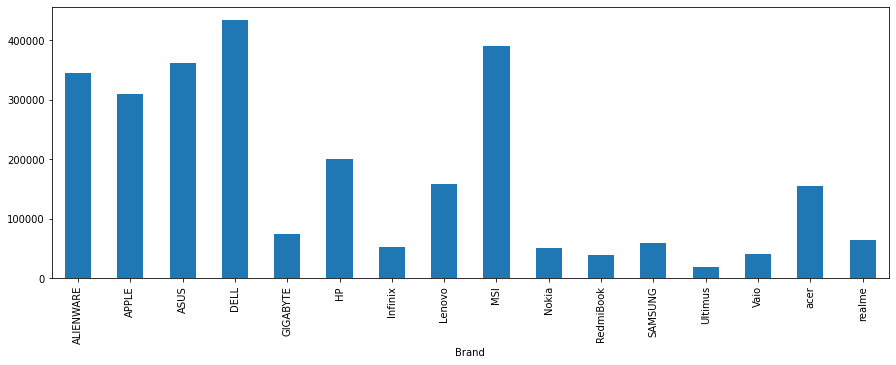

In [50]:
plt.figure(figsize=(15,5))
dataset.groupby(['Brand'])['MRP'].max().plot(kind='bar')
plt.show()

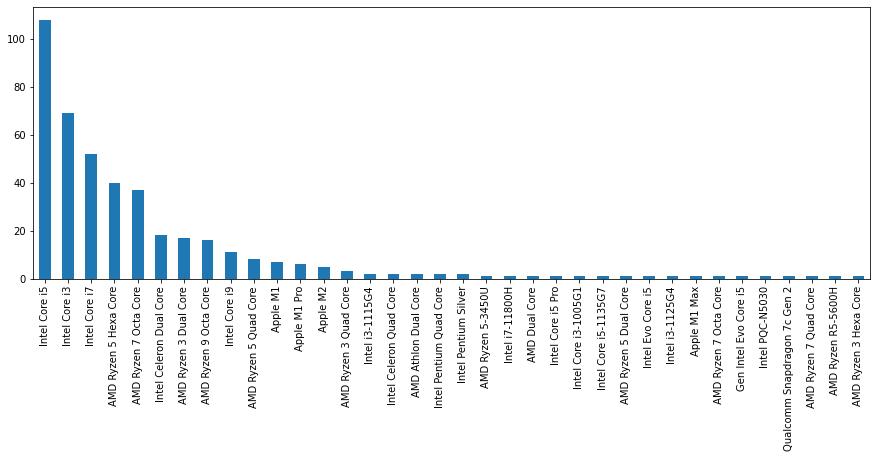

In [51]:
plt.figure(figsize=(15,5))
dataset['Processor_Type'].value_counts().plot(kind='bar')
plt.show()

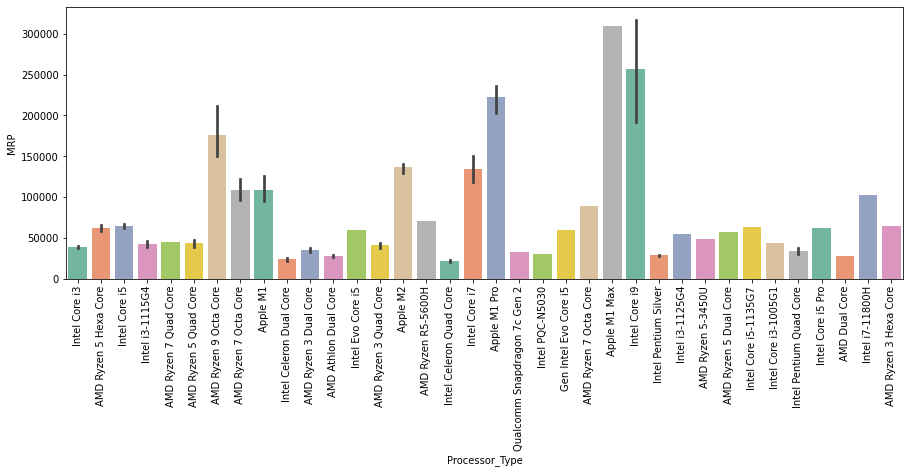

In [52]:
plt.figure(figsize=(15,5))
sns.barplot(dataset['Processor_Type'],dataset['MRP'],palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

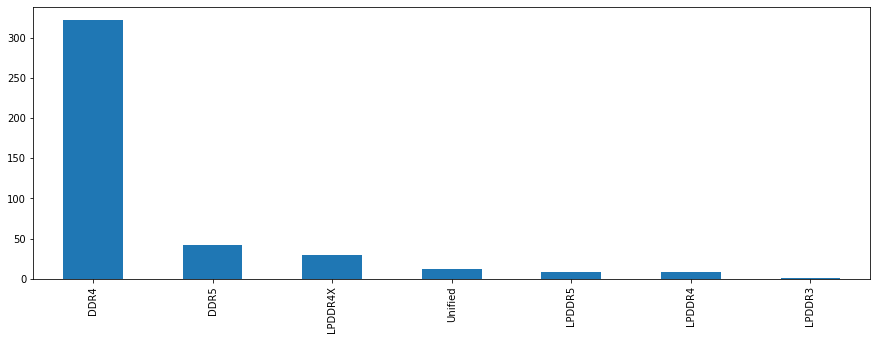

In [53]:
plt.figure(figsize=(15,5))
dataset['RAM_Type'].value_counts().plot(kind='bar')
plt.show()

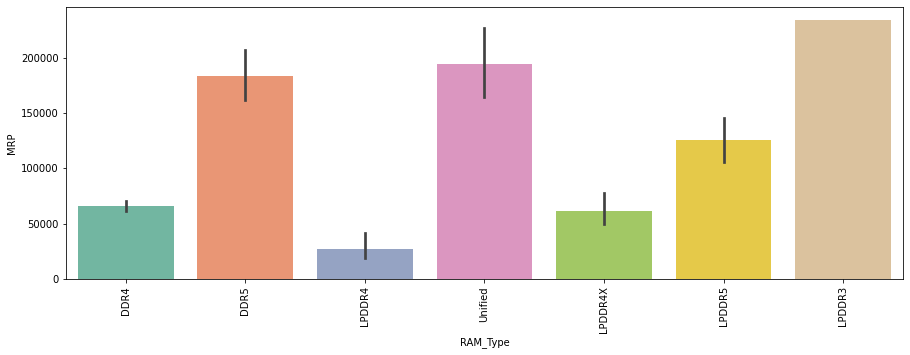

In [54]:
plt.figure(figsize=(15,5))
sns.barplot(dataset['RAM_Type'],dataset['MRP'],palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

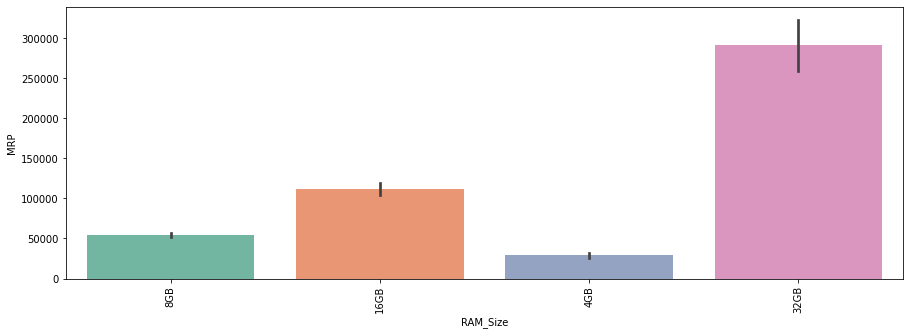

In [55]:
plt.figure(figsize=(15,5))
sns.barplot(dataset['RAM_Size'],dataset['MRP'],palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

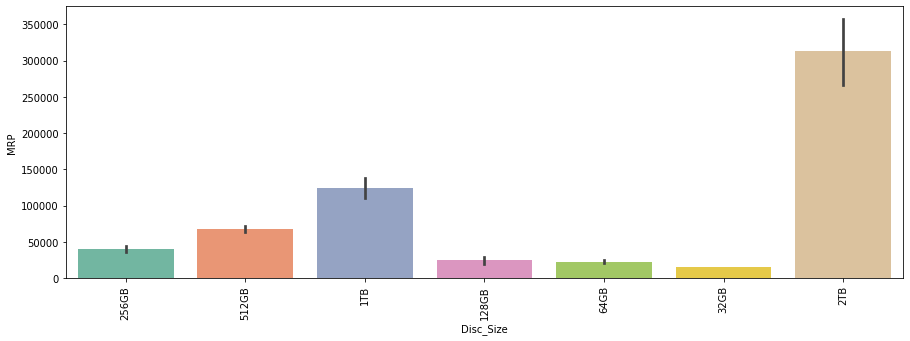

In [56]:
plt.figure(figsize=(15,5))
sns.barplot(dataset['Disc_Size'],dataset['MRP'],palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

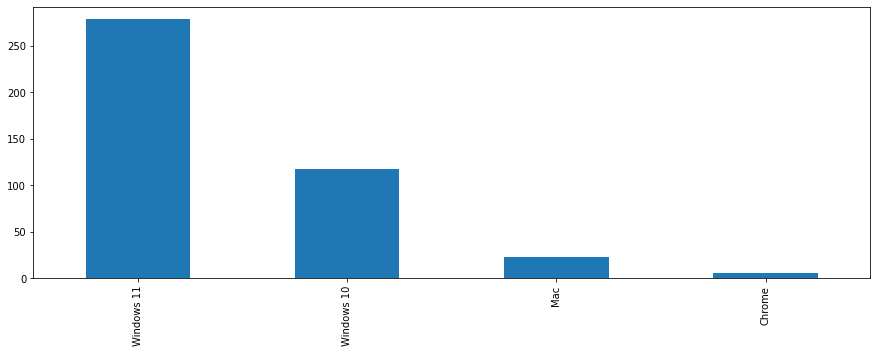

In [57]:
plt.figure(figsize=(15,5))
dataset['Operating_System'].value_counts().plot(kind='bar')
plt.show()

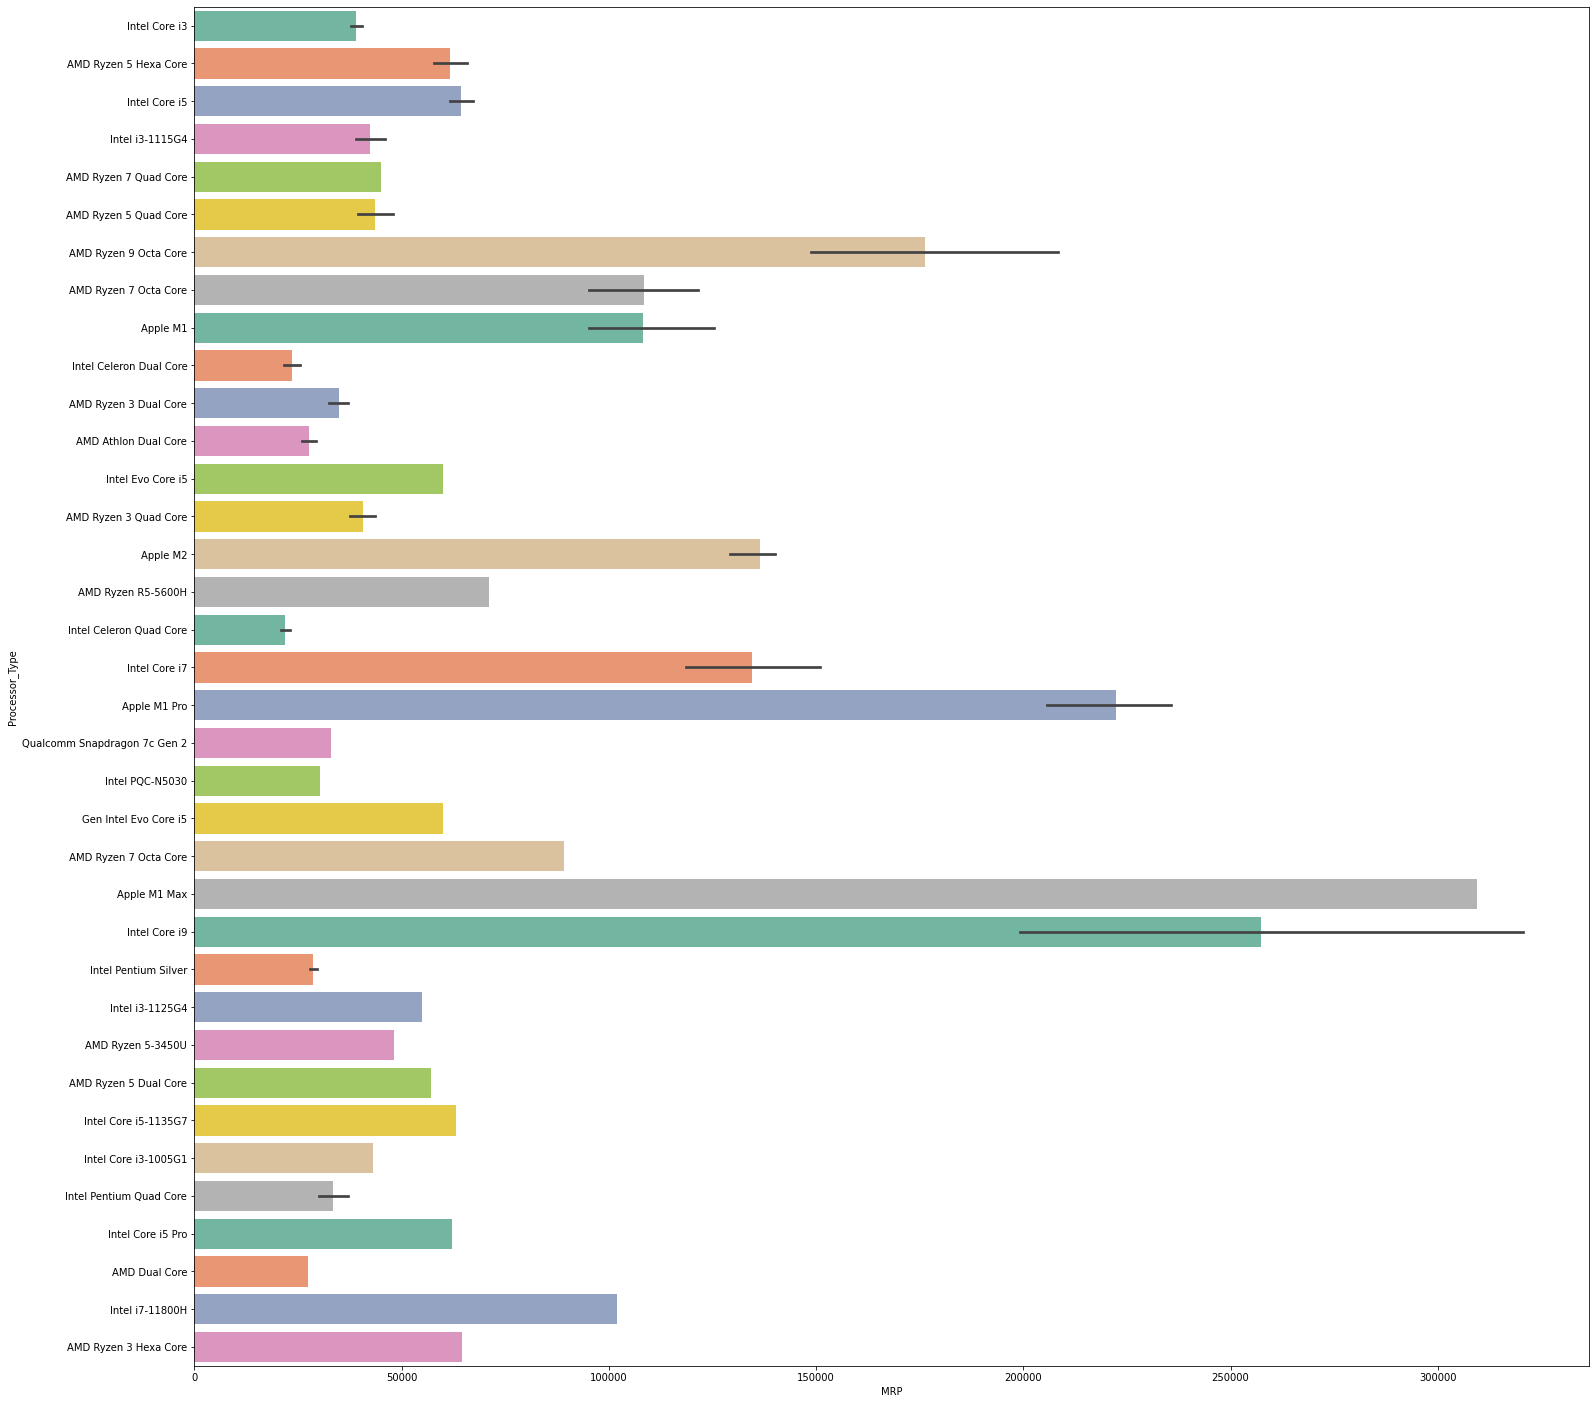

In [58]:
plt.figure(figsize=(25,25))
sns.barplot(dataset['MRP'],dataset['Processor_Type'],palette='Set2',orient='h')
plt.show()

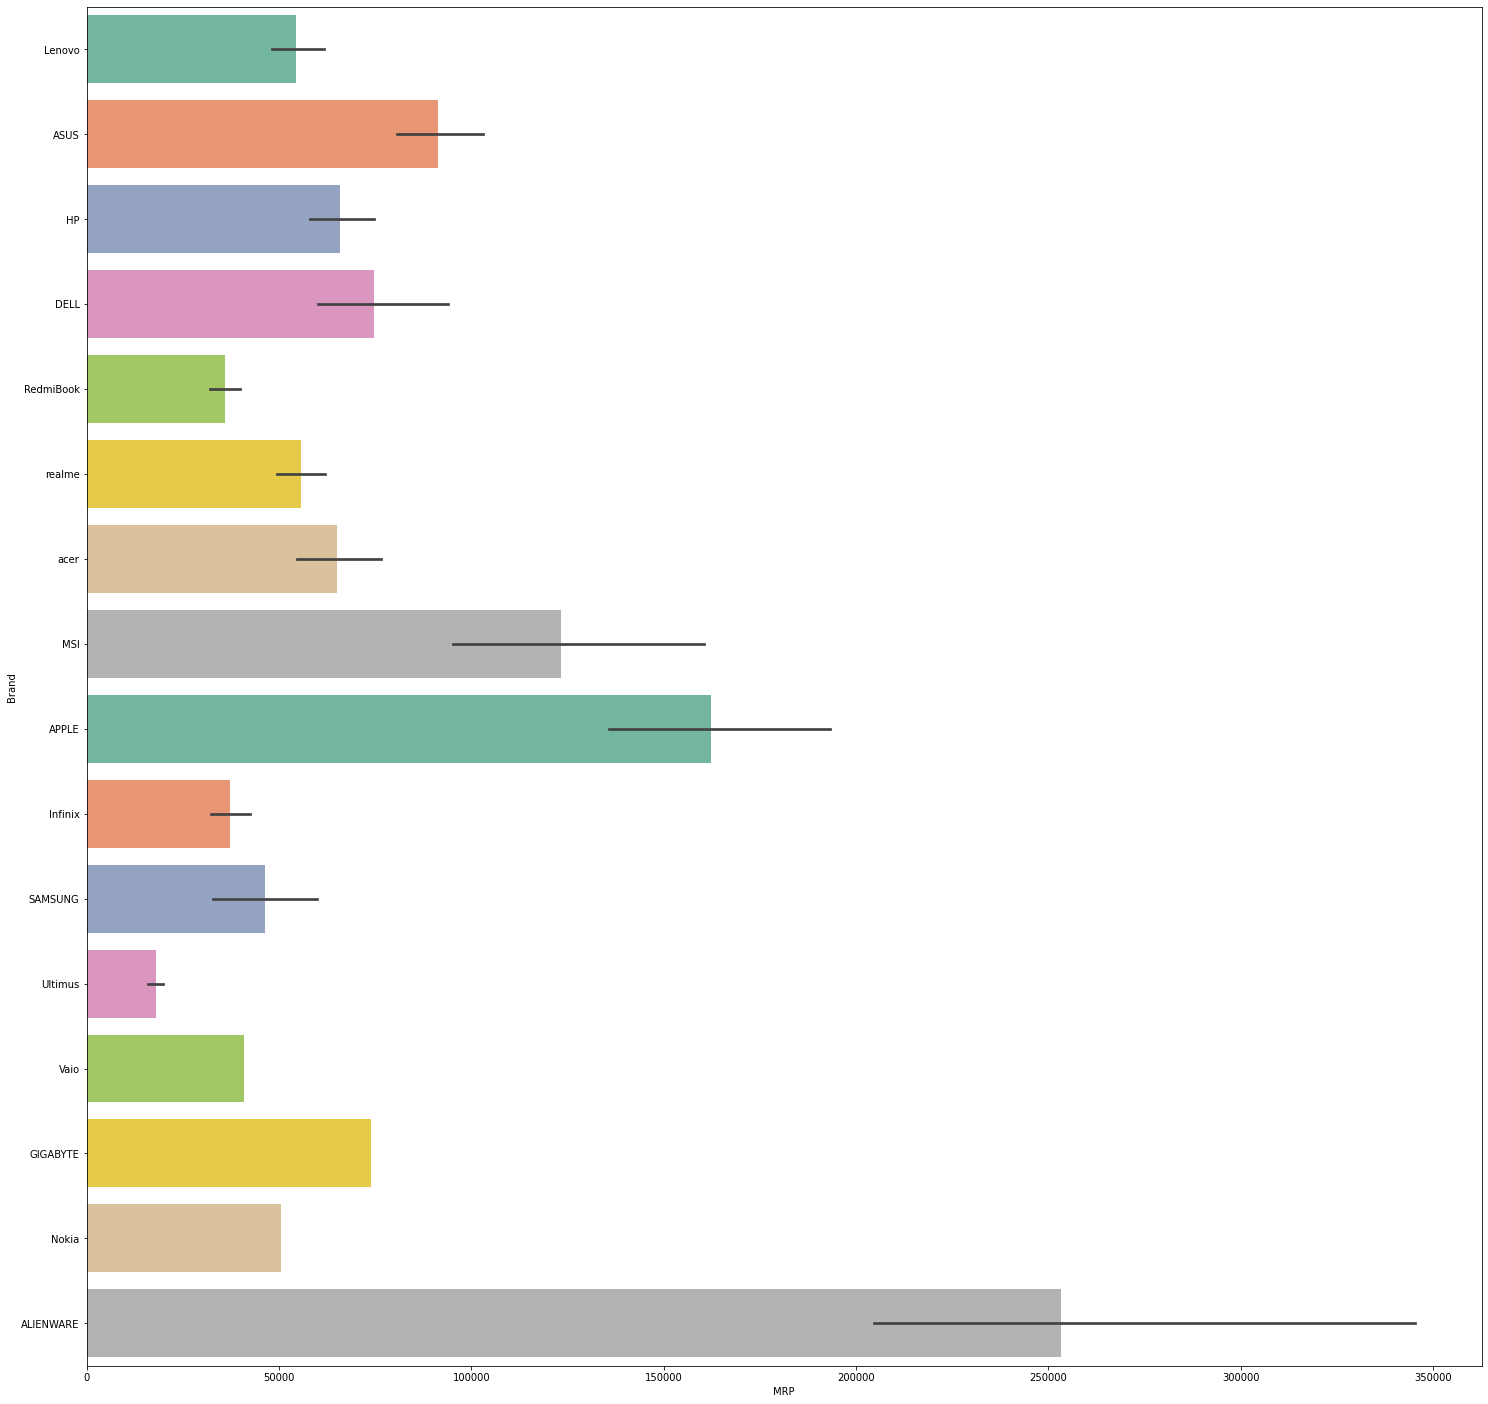

In [59]:
plt.figure(figsize=(25,25))
sns.barplot(dataset['MRP'],dataset['Brand'],palette='Set2',orient='h')
plt.show()

### Analysis

- Highest Brand Price ALIENWARE
- MRP Log Normal Distribution
- Top 5 Brands ASUS Lenovo HP DELL acer
- Highest CPU Price Intel Core i9 AMD Ryzen 9 Intel Core i7 AMD Ryzen 7
- Highest RAM Price 32 128 16
- Highest Storage Price 1TB 512SSD 128SSD
- Highest Price Operating System MAC Windows DOS
- High Quantity CPU Intel Core i5
- High Quantity Generation Laptop 11th 10th
- High Quantity Laptop Types TUF Gaming IdeaPad 3
- High Laptop Types Price 2021 Macbook Core i9 ROG Flow
- High Rating Laptop APPLE SAMSUNG
- High Rating Processor Intel Pentium Quad Core AMD Ryzen 9 Octa Core Intel Core i9 AMD Ryzen 7 Octa Core
- High Rating Operating System 64bit DOS 64bit Windows10 64bit Windows11
- High RAM Rating 32GB LPD DDR4X 32GB DDR5 16GB Unified Memory 8GB Unified Memory 
- High Storage Rating 1TB SSD 128SSD and 1TB HHD 1TB HHD and 512GB SSD
- High Storage Rating 2TB SSD 128SSD and 1TB HHD 1TB HHD and 512GB SSD
-  Price for laptop brand ALIENWARE is ranges approximetely from 2 Lakh to 3.5 Lakh, these are costiest laptops
- Average price for ALIENWARE APPLE ASUS MSI laptops brand is high
- Average price is high for Mac Operating System laptops
- Apple M1 Max processor laptops has high average laptop price as compared to any other processor
- LPDDR3 RAM type laptops has highest average price
- SSD Disc type laptops has highest aaverage price
- Higher the RAM size higher the Price of laptop
- Higher the Disc size highrt the Price of laptop
- 64GB RAM size laptops have high average price
- 2TB Disc size laptops have high average price

**`Sprint - 2 (ML Model Tuning)`**

In [35]:
dataset.drop(columns=['Product','Rating','Feature'],inplace=True)

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 719
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MRP               424 non-null    int32 
 1   Brand             424 non-null    object
 2   Processor_Type    424 non-null    object
 3   Operating_System  424 non-null    object
 4   RAM_Size          424 non-null    object
 5   RAM_Type          424 non-null    object
 6   Disc_Size         424 non-null    object
 7   Disc_Type         424 non-null    object
dtypes: int32(1), object(7)
memory usage: 28.2+ KB


In [37]:
dataset.isnull().sum()

MRP                 0
Brand               0
Processor_Type      0
Operating_System    0
RAM_Size            0
RAM_Type            0
Disc_Size           0
Disc_Type           0
dtype: int64

In [38]:
dataset.duplicated().sum()

19

In [39]:
# dataset = dataset.drop_duplicates()

In [40]:
# dataset['Brand'].unique()

In [41]:
# Brand Type

def replace_brand(brand):

    if brand == 'Lenovo':
        return 1
    elif brand == 'ASUS':
        return 2
    elif brand == 'HP':
        return 3
    elif brand == 'DELL':
        return 4
    elif brand == 'RedmiBook':
        return 5
    elif brand == 'realme':
        return 6
    elif brand == 'acer':
        return 7
    elif brand == 'MSI':
        return 8
    elif brand == 'APPLE':
        return 9
    elif brand == 'Infinix':
        return 10
    elif brand == 'SAMSUNG':
        return 11
    elif brand == 'Ultimus':
        return 12
    elif brand == 'Vaio':
        return 13
    elif brand == 'GIGABYTE':
        return 14
    elif brand == 'Nokia':
        return 15
    elif brand == 'ALIENWARE':
        return 16
    
dataset['Brand'] = dataset['Brand'].apply(replace_brand)
dataset['Brand'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [42]:
dataset.drop(columns=['Processor_Type'],inplace=True)

In [43]:
dataset['Operating_System'].unique()

array(['Windows 11', 'Windows 10', 'Mac', 'Chrome'], dtype=object)

In [44]:
# Operating System Type

def replace_os(os):
    
    if os == 'Windows 11':
        return 1
    elif os == 'Windows 10':
        return 2
    elif os == 'Mac':
        return 3
    elif os == 'Chrome':
        return 4
    elif os == 'DOS':
        return 5
    
dataset['Operating_System'] = dataset['Operating_System'].apply(replace_os)
dataset['Operating_System'].unique()

array([1, 2, 3, 4], dtype=int64)

In [45]:
dataset['RAM_Type'].unique()

array(['DDR4', 'DDR5', 'LPDDR4', 'Unified', 'LPDDR4X', 'LPDDR5', 'LPDDR3'],
      dtype=object)

In [46]:
# RAM Type

def replace_ram_type(ram_type):
    
    if ram_type == 'DDR4':
        return 1
    elif ram_type == 'DDR5':
        return 2
    elif ram_type == 'LPDDR4':
        return 3
    elif ram_type == 'Unified':
        return 4
    elif ram_type == 'LPDDR4X':
        return 5
    elif ram_type == 'LPDDR5':
        return 6
    elif ram_type == 'LPDDR3':
        return 7
    
dataset['RAM_Type'] = dataset['RAM_Type'].apply(replace_ram_type)
dataset['RAM_Type'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [47]:
dataset['RAM_Size'].unique()

array(['8GB', '16GB', '4GB', '32GB'], dtype=object)

In [48]:
# RAM Sizes

def replace_ram_size(ram_size):
    
    if ram_size == '8GB':
        return 1
    elif ram_size == '16GB':
        return 2
    elif ram_size == '4GB':
        return 3
    elif ram_size == '32GB':
        return 4

    
dataset['RAM_Size'] = dataset['RAM_Size'].apply(replace_ram_size)
dataset['RAM_Size'].unique()

array([1, 2, 3, 4], dtype=int64)

In [49]:
dataset['Disc_Type'].unique()

array(['SSD', 'HDD', 'EMMC'], dtype=object)

In [50]:
# Disc Type

def replace_disc_type(disc_type):
    
    if disc_type == 'SSD':
        return 1
    elif disc_type == 'HDD':
        return 2
    elif disc_type == 'EMMC':
        return 3

    
dataset['Disc_Type'] = dataset['Disc_Type'].apply(replace_disc_type)
dataset['Disc_Type'].unique()

array([1, 2, 3], dtype=int64)

In [51]:
dataset['Disc_Size'].unique()

array(['256GB', '512GB', '1TB', '128GB', '64GB', '32GB', '2TB'],
      dtype=object)

In [52]:
# Disc Sizes

def replace_disc_size(disc_size):
    
    if disc_size == '256GB':
        return 1
    elif disc_size == '512GB':
        return 2
    elif disc_size == '1TB':
        return 3
    elif disc_size == '128GB':
        return 4
    elif disc_size == '64GB':
        return 5
    elif disc_size == '32GB':
        return 6
    elif disc_size == '2TB':
        return 7
    
dataset['Disc_Size'] = dataset['Disc_Size'].apply(replace_disc_size)
dataset['Disc_Size'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

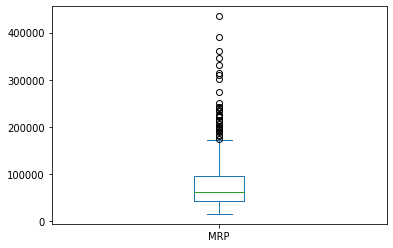

In [53]:
dataset['MRP'].plot(kind='box')
plt.show()

In [54]:
X = dataset.drop(columns=['MRP'])
y = dataset['MRP']

In [55]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [57]:
linear = LinearRegression()
linear.fit(X_train,y_train)

neighbor = KNeighborsRegressor(n_neighbors=3)
neighbor.fit(X_train,y_train)

dectree = DecisionTreeRegressor(max_depth=8)
dectree.fit(X_train,y_train)

randforest = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
randforest.fit(X_train,y_train)

gradboost = GradientBoostingRegressor(n_estimators=500)
gradboost.fit(X_train,y_train)

adaboost = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
adaboost.fit(X_train,y_train)

extree = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,bootstrap=True)
extree.fit(X_train,y_train)

svm = SVR(kernel='rbf',C=10000,epsilon=0.1)
svm.fit(X_train,y_train)

xg = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=45, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [58]:
y_pred_1 = linear.predict(X_test)
y_pred_2 = neighbor.predict(X_test)
y_pred_3 = dectree.predict(X_test)
y_pred_4 = randforest.predict(X_test)
y_pred_5 = gradboost.predict(X_test)
y_pred_6 = adaboost.predict(X_test)
y_pred_7 = extree.predict(X_test)
y_pred_8 = svm.predict(X_test)
y_pred_9 = xg.predict(X_test)
# y_pred_10 = .predict(X_test)

In [59]:
score_1 = metrics.r2_score(y_test,y_pred_1)
score_2 = metrics.r2_score(y_test,y_pred_2)
score_3 = metrics.r2_score(y_test,y_pred_3)
score_4 = metrics.r2_score(y_test,y_pred_4)
score_5 = metrics.r2_score(y_test,y_pred_5)
score_6 = metrics.r2_score(y_test,y_pred_6)
score_7 = metrics.r2_score(y_test,y_pred_7)
score_8 = metrics.r2_score(y_test,y_pred_8)
score_9 = metrics.r2_score(y_test,y_pred_9)
# score_4 = metrics.r2_score(y_test,y_pred_10)

In [60]:
print(score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9)

0.5522726773815707 0.629006994410689 0.6692898914147595 0.7905422405112288 0.7804416999740463 0.7020573289385743 0.7871436066404109 0.42759947669799026 0.8019127225005865


In [61]:
final_data = pd.DataFrame({'Models':['Linear','Neighbor','Dectree','Randforest','Gradboost','Adaboost','Extree','Svm','Xg'],
              'R2_Score':[score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9]})

In [87]:
final_data

,Models,R2_Score
0,Linear,0.506840
1,Neighbor,0.795473
2,Dectree,0.666793
3,Randforest,0.773126
4,Gradboost,0.718369
5,Adaboost,0.652002
6,Extree,0.773801
7,Svm,0.546288
8,Xg,0.716781


In [88]:
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

xgb = XGBRegressor(learning_rate=0.15, n_estimators=50, max_leaves=0, random_state=42)
rcv = RandomizedSearchCV(estimator=xgb,param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=1, random_state=15, n_jobs=-1)

rcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.15, max_bin=None,
                                          m...
                                                  3.2, 6.4, 12.8, 25.6, 51.2,
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25,
                                                          0.300000012, 0.4, 0.5,
                                                          0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   random_state=15, verbose=1)

In [89]:
y_pred = rcv.predict(X_test)

In [90]:
score = metrics.r2_score(y_test,y_pred)

In [91]:
print(score)

0.7534656117582994


In [92]:
xgb_reg = XGBRegressor(learning_rate=0.15, n_estimators=50, max_leaves=0, random_state=42)

k_shuf = ShuffleSplit(n_splits=20, test_size=0.2, random_state=20)
c_score = cross_val_score(xgb_reg, X, y, cv=k_shuf)

print('Cross Validations Score:\n', c_score)
print('Average Cross Validations Score:', c_score.mean())
print('Maximum Cross Validations Score:', c_score.max())
print('Minimum Cross Validations Score:', c_score.min())

Cross Validations Score:
 [0.84943138 0.77076389 0.81189853 0.771585   0.76283967 0.83054137
 0.87838395 0.83422161 0.79721047 0.8705213  0.85499586 0.89462825
 0.83671964 0.76880864 0.87004378 0.8328489  0.85864733 0.82433516
 0.79741917 0.76594398]
Average Cross Validations Score: 0.8240893937701077
Maximum Cross Validations Score: 0.8946282532509302
Minimum Cross Validations Score: 0.7628396655795203


In [93]:
xgb_1 = XGBRegressor(learning_rate=0.15, n_estimators=50, max_leaves=0, random_state=42)

xgb_1.fit(X_train,y_train)
xgb_pred = xgb_1.predict(X_test)

print('R2_Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2_Score 0.7534656117582994
MAE 19231.52813720703
MSE 925237539.182854


In [94]:
rf_1 = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt_1 = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb_2 = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et_1 = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)


vot = VotingRegressor([('rf_1', rf_1), ('gbdt_1', gbdt_1), ('xgb_2',xgb_2), ('et_1',et_1)],weights=[5,1,1,1])

vot.fit(X_train,y_train)

y_pred = vot.predict(X_test)

print('R2_Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_Score 0.7578928125762698
MAE 19522.776638420044


In [95]:
estimators = [
    ('rf_1', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt_1',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb_2', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

stack = StackingRegressor(estimators=estimators,final_estimator=Ridge(alpha=100))   
    
stack.fit(X_train,y_train)

y_pred = stack.predict(X_test)

print('R2_Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))    

R2_Score 0.7515459616459308
MAE 19647.897252882387


In [98]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_3 = RandomForestRegressor(random_state=42)

grid_search_0 = GridSearchCV(rf_3, param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)

grid_search_0.fit(X_train,y_train)

print(grid_search_0.best_params_)

grid_y_pred_0 = grid_search_0.predict(X_test)

print('R2_Score',r2_score(y_test,grid_y_pred_0))
print('MAE',mean_absolute_error(y_test,grid_y_pred_0))

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
R2_Score 0.7678571798901682
MAE 18895.604953078644


In [99]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'gamma': [0, 0.1, 0.2]
}

xgb_3 = XGBRegressor(random_state=42)

grid_search_1 = GridSearchCV(xgb_3, param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)

grid_search_1.fit(X, y)

grid_search_1.fit(X_train,y_train)

print(grid_search_1.best_params_)

grid_y_pred_2 = grid_search_1.predict(X_test)

print('R2_Score',r2_score(y_test,grid_y_pred_2))
print('MAE',mean_absolute_error(y_test,grid_y_pred_2))

{'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1}
R2_Score 0.7201119714108523
MAE 19925.267944335938


In [75]:
neighbor_1 = KNeighborsRegressor(n_neighbors=3,
                                 weights='uniform',
                                 algorithm='auto',
                                 leaf_size=50,
                                 p=2,
                                 metric='minkowski',
                                 metric_params=None,
                                 n_jobs=-1,
                            )
neighbor_1.fit(X_train,y_train)

KNeighborsRegressor(leaf_size=50, n_jobs=-1, n_neighbors=3)

In [76]:
neighbor_y_pred = neighbor_1.predict(X_test)

In [77]:
neighbor_score = metrics.r2_score(y_test,neighbor_y_pred)

In [78]:
neighbor_score

0.63464785615165

In [74]:
pickle.dump(neighbor,open('laptop_price_predictor.pkl','wb'))

In [ ]:
model = pickle.load(open('laptop_price_predictor.pkl','rb'))

In [79]:
joblib.dump(randforest,'laptop_price_predictor.job')

['laptop_price_predictor.job']

In [81]:
dataset.to_csv('laptop_details_encoder.csv')

In [ ]:
# Thank You!